<a href="https://colab.research.google.com/github/sandalihansika/automata/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN)
CNNs are deep learning models that analyze visual data, identifying patterns through layers for tasks like image classification, object detection, and facial recognition.

# Computer Vision Applications

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


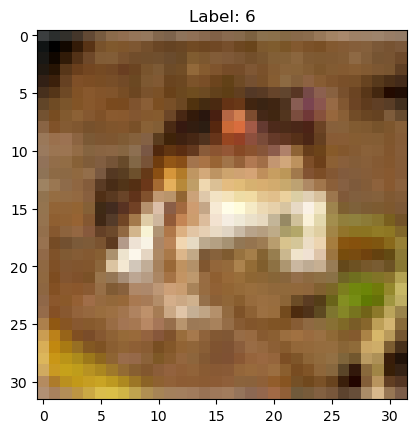

In [ ]:
# Print the shape of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the first image in the training set
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


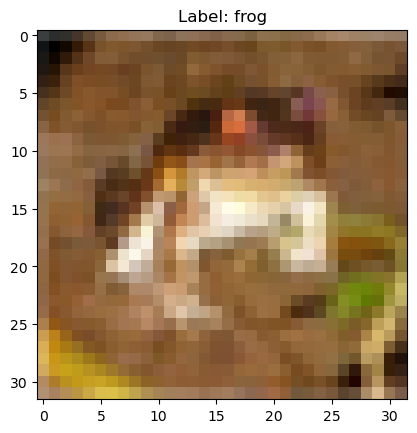

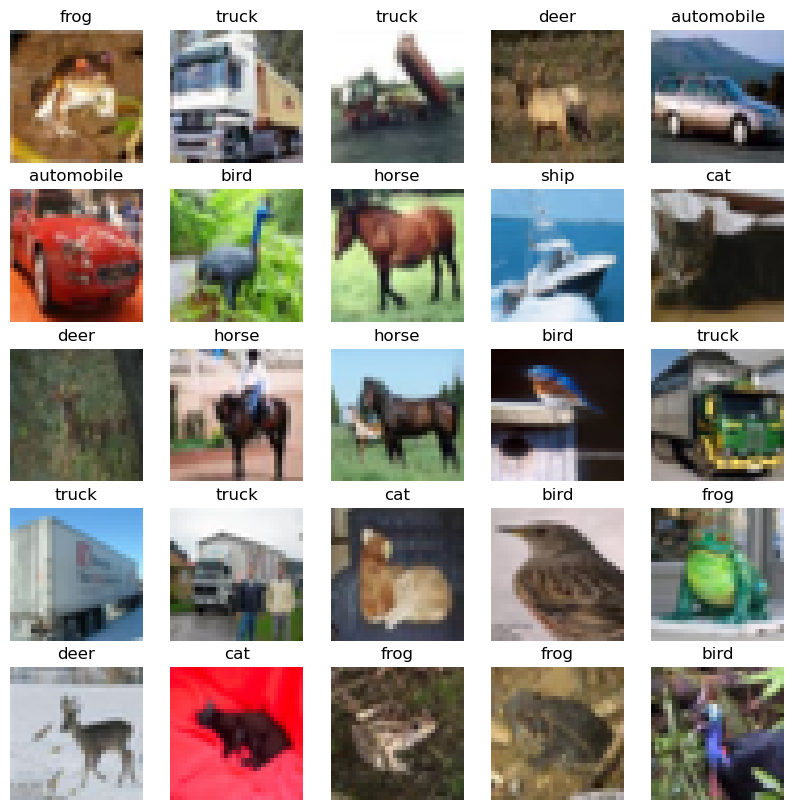

In [ ]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Print the shape of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first image in the training set
plt.imshow(x_train[0])
plt.title(f"Label: {class_names[y_train[0][0]]}")
plt.show()

# Plot the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


# Edge Detect

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Define the input image (6x6) and filter (3x3)
input_image = np.array([
    [3, 0, 1, 2, 7, 4],
    [1, 5, 8, 9, 3, 1],
    [2, 7, 2, 5, 1, 3],
    [0, 1, 3, 1, 7, 8],
    [4, 2, 1, 6, 2, 8],
    [2, 4, 5, 2, 3, 9]
], dtype=np.float32)

filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

# Add batch and channel dimensions
input_image = np.expand_dims(input_image, axis=(0, -1))  # Shape (1, 6, 6, 1)
filter_kernel = np.expand_dims(filter_kernel, axis=(2, 3))  # Shape (3, 3, 1, 1)

# Define the Conv2D layer
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), padding='valid', use_bias=False,
                    kernel_initializer=tf.constant_initializer(filter_kernel))

# Apply the convolution
# Note: Keras operations are evaluated eagerly in TensorFlow 2.x
output_image = conv_layer(tf.convert_to_tensor(input_image))

# Convert the result to numpy and print
output_image_np = output_image.numpy()
print("Output Image (4x4):")
print(output_image_np.squeeze())


Output Image (4x4):
[[ -5.  -4.   0.   8.]
 [-10.  -2.   2.   3.]
 [  0.  -2.  -4.  -7.]
 [ -3.  -2.  -3. -16.]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


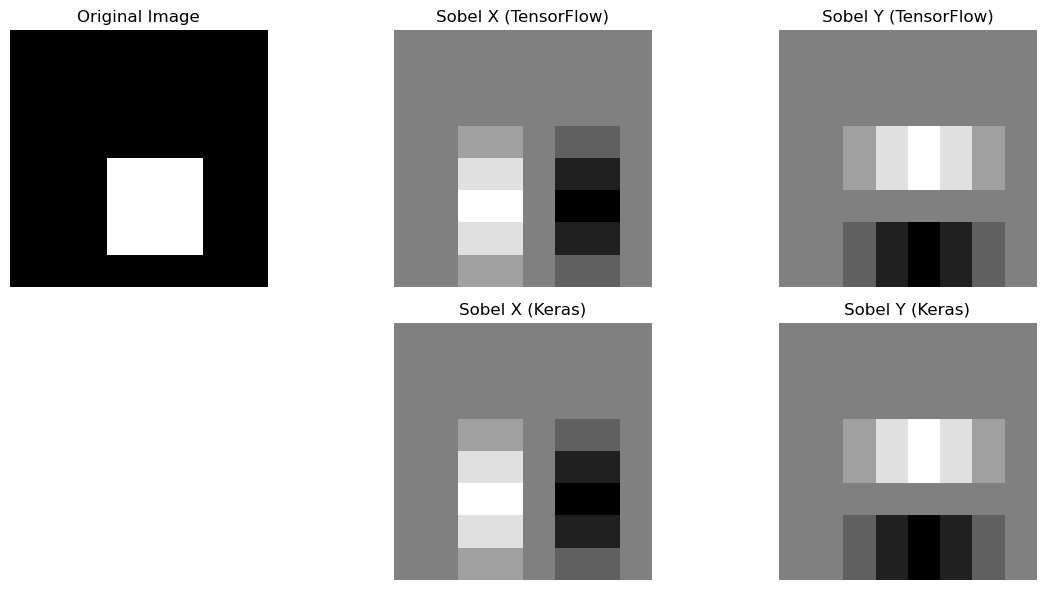

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define the input image (8x8) with a simple vertical edge
input_image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# Add batch and channel dimensions
input_image = np.expand_dims(input_image, axis=(0, -1))  # Shape (1, 8, 8, 1)

# Define Sobel filters for edge detection
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=np.float32)
# Add filter dimensions
sobel_x = np.expand_dims(sobel_x, axis=(2, 3))  # Shape (3, 3, 1, 1)
sobel_y = np.expand_dims(sobel_y, axis=(2, 3))  # Shape (3, 3, 1, 1)

# TensorFlow edge detection using tf.nn.conv2d
def edge_detection_tf(input_image, filter):
    input_tensor = tf.convert_to_tensor(input_image)
    filter_tensor = tf.convert_to_tensor(filter)
    input_tensor = tf.cast(input_tensor, dtype=tf.float32)
    filter_tensor = tf.cast(filter_tensor, dtype=tf.float32)
    conv = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')
    return conv.numpy()

# Keras edge detection using Conv2D
def edge_detection_keras(input_image, filter):
    input_layer = Input(shape=(8, 8, 1))
    conv_layer = Conv2D(filters=1, kernel_size=(3, 3), padding='same', use_bias=False,
                        kernel_initializer=tf.constant_initializer(filter))(input_layer)
    model = Model(inputs=input_layer, outputs=conv_layer)
    return model.predict(input_image)

# Apply edge detection
output_x_tf = edge_detection_tf(input_image, sobel_x)
output_y_tf = edge_detection_tf(input_image, sobel_y)

output_x_keras = edge_detection_keras(input_image, sobel_x)
output_y_keras = edge_detection_keras(input_image, sobel_y)

# Combine the results
edges_tf = np.sqrt(output_x_tf**2 + output_y_tf**2)
edges_keras = np.sqrt(output_x_keras**2 + output_y_keras**2)

# Plot results
def plot_image(image, title):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plot_image(input_image, 'Original Image')

plt.subplot(2, 3, 2)
plot_image(output_x_tf, 'Sobel X (TensorFlow)')

plt.subplot(2, 3, 3)
plot_image(output_y_tf, 'Sobel Y (TensorFlow)')

plt.subplot(2, 3, 5)
plot_image(output_x_keras, 'Sobel X (Keras)')

plt.subplot(2, 3, 6)
plot_image(output_y_keras, 'Sobel Y (Keras)')

plt.tight_layout()
plt.show()


# Padding

Output with 'valid' padding:
[[-6. 15. 18.  0.]
 [-4. 13. 15.  0.]
 [-2.  8.  9.  0.]
 [ 0.  0.  0.  0.]]

Output with 'same' padding:
[[ -7.  -4.   7.   9.   0.   0.]
 [-15.  -6.  15.  18.   0.   0.]
 [-13.  -4.  13.  15.   0.   0.]
 [ -8.  -2.   8.   9.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]]


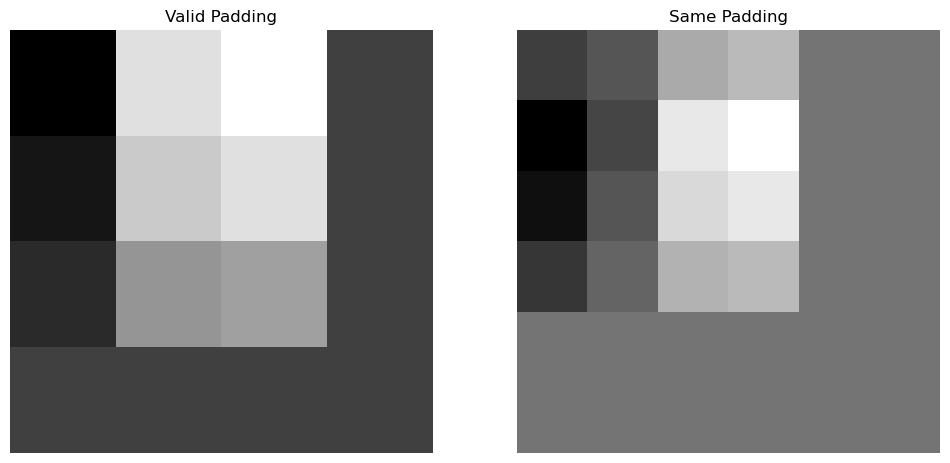

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define the input image (6x6) and filter (3x3)
input_image = np.array([
    [1, 2, 3, 0, 0, 0],
    [4, 5, 6, 0, 0, 0],
    [7, 8, 9, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
], dtype=np.float32)

filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=np.float32)

# Add batch and channel dimensions
input_image = np.expand_dims(input_image, axis=(0, -1))  # Shape (1, 6, 6, 1)
filter_kernel = np.expand_dims(filter_kernel, axis=(2, 3))  # Shape (3, 3, 1, 1)

# Define the model for 'valid' padding
input_layer = Input(shape=(6, 6, 1))
conv_layer_valid = Conv2D(filters=1, kernel_size=(3, 3), padding='valid', use_bias=False,
                          kernel_initializer=tf.constant_initializer(filter_kernel))(input_layer)
model_valid = Model(inputs=input_layer, outputs=conv_layer_valid)

# Define the model for 'same' padding
conv_layer_same = Conv2D(filters=1, kernel_size=(3, 3), padding='same', use_bias=False,
                         kernel_initializer=tf.constant_initializer(filter_kernel))(input_layer)
model_same = Model(inputs=input_layer, outputs=conv_layer_same)

# Apply the convolutions
output_valid = model_valid(tf.convert_to_tensor(input_image)).numpy()
output_same = model_same(tf.convert_to_tensor(input_image)).numpy()

# Print results
print("Output with 'valid' padding:")
print(output_valid.squeeze())

print("\nOutput with 'same' padding:")
print(output_same.squeeze())

# Plot results
def plot_image(image, title):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_image(output_valid, 'Valid Padding')

plt.subplot(1, 2, 2)
plot_image(output_same, 'Same Padding')

plt.show()
